# Ragy Ibrahim (214448734) - MIS720 - AT1

In [19]:
##SID Modulus
214448734%5

4

### Import all required modules

In [20]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics as st

# Part 1

### Load data

Load CSV into Numpy array

In [21]:
M = np.genfromtxt('digitData4.csv', delimiter= ',')
print(len(M))
print(len(M[0]))

1630
65


Training Features

In [22]:
X = np.array(M[:,:63])
print(len(X))
print(len(X[0]))

1630
63


Assign True Labels to vector

In [23]:
trueLabels = np.array(M[:,64])
print(len(trueLabels))

1630


### Scale data for clustering

#### Centre data

In [77]:
#Find global mean
meanX = X.mean()
Xcentred = X - meanX
print('Mean: %.3f' % meanX)
print('Min: %.3f, Max: %.3f' % (Xcentred.min(), Xcentred.max()))

Mean: 0.309
Min: -0.309, Max: 0.691


#### Normalise data

In [78]:
scaledCentredX = Xcentred
scaledCentredX /= scaledCentredX.max()
print('Min: %.3f, Max: %.3f' % (scaledCentredX.min(), scaledCentredX.max()))

Min: -0.447, Max: 1.000


### K-Means Clustering

Run k-means with 5 clusters

In [104]:
#Run clustering after scaling
kMeans_5_Euc = KMeans(init='random',n_clusters=10)
kMeansFit = kMeans_5_Euc.fit(scaledCentredX)
kMeans_pred=np.array(kMeansFit.predict(scaledCentredX))

Evaluate Model Performance

In [105]:
## Adjusted Rand Index
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI =", adjusted_rand_score(trueLabels, kMeans_pred))
## Adjusted Mutual Information
from sklearn.metrics.cluster import adjusted_mutual_info_score
print("AMI =", adjusted_mutual_info_score(trueLabels, kMeans_pred))

('ARI =', 0.6690780048283701)
('AMI =', 0.7408152571235515)


### Run K-Means for 50 Iterations and Evaluate

#### Evaluate using ARI

('Max ARI socre: ', 0.38793198049980676)
('Average ARI socre: ', 0.34080536549094775)
('Min ARI socre: ', 0.28839601786409663)


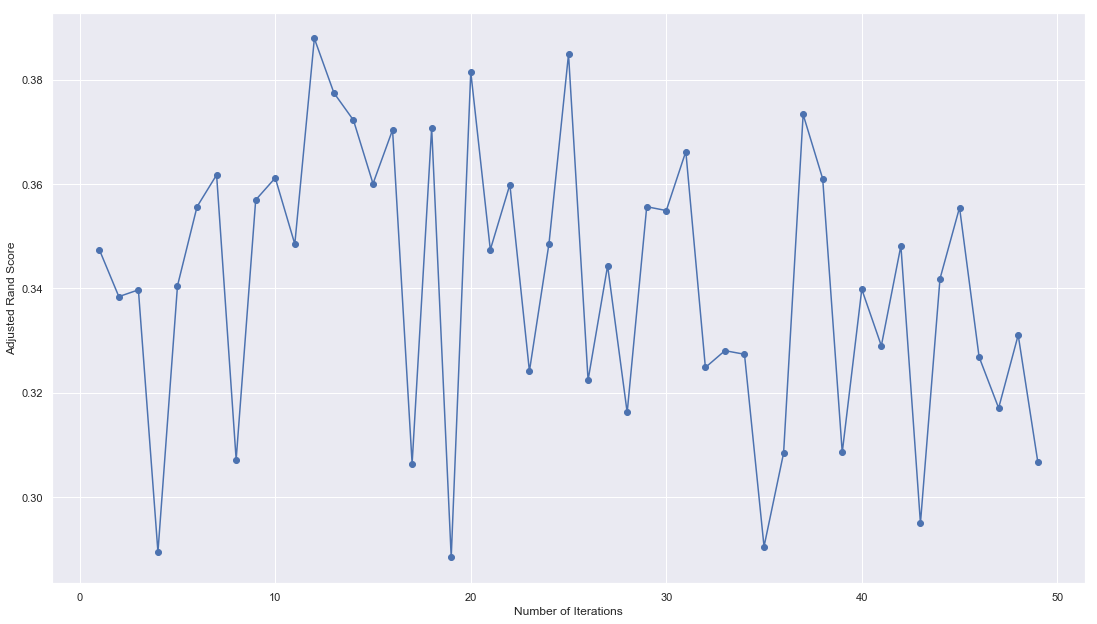

In [202]:
evalObject1 = [] 
numbIterations = list(range(1,50))
for i in numbIterations:
    def kmeansLoop(x,clst,itera,evals):
        km = KMeans(init='random',n_clusters=clst, n_init=itera)
        km.fit(x)
        km_pred = km.predict(x)
        evalObject1.append(evals(trueLabels, km_pred))
    kmeansLoop(scaledCentredX,5,1,adjusted_rand_score)
print("Max ARI socre: ", max(evalObject1))
print("Average ARI socre: ", st.mean(evalObject1))
print("Min ARI socre: ", min(evalObject1))
plt.figure(figsize=(6, 6))
plt.plot(numbIterations, evalObject1, '-o')
plt.xlabel(r'Number of Iterations')
plt.ylabel('Adjusted Rand Score')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

#### Evaluate using ARI

('Max AMI socre: ', 0.4834674625983573)
('Average AMI socre: ', 0.4298761063266956)
('Min AMI socre: ', 0.37440021494699166)


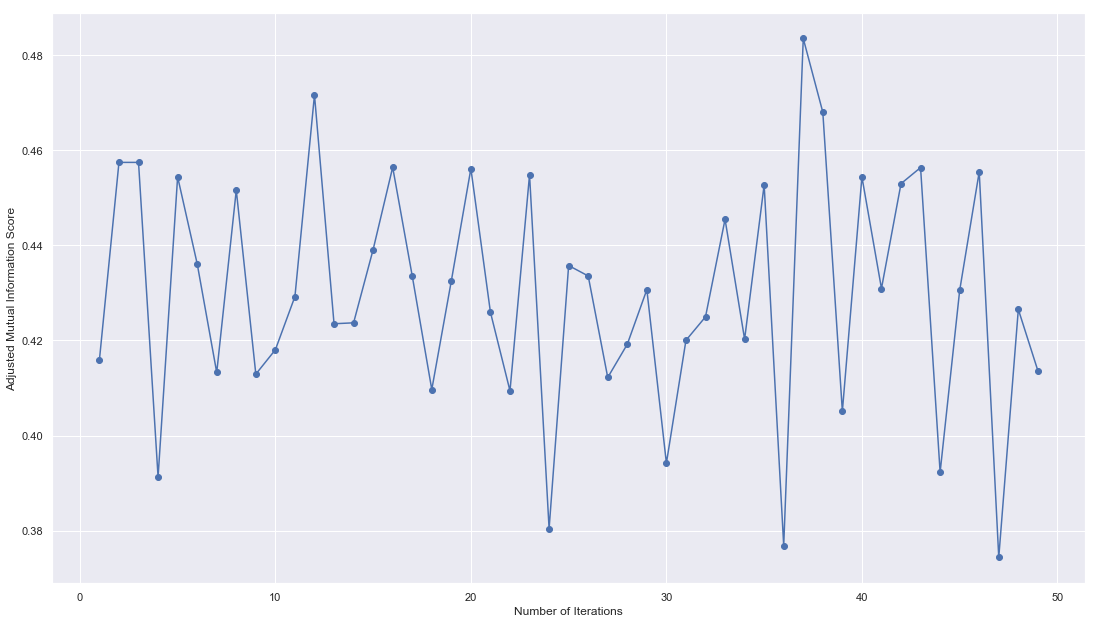

In [201]:
evalObject2 = [] 
numbIterations = list(range(1,50))
for j in numbIterations:
    def kmeansLoop(x,clst,itera,evals):
        km = KMeans(init='random',n_clusters=clst, n_init=itera)
        km.fit(x)
        km_pred = km.predict(x)
        evalObject2.append(evals(trueLabels, km_pred))
    kmeansLoop(scaledCentredX,5,1,adjusted_mutual_info_score)
print("Max AMI socre: ", max(evalObject2))
print("Average AMI socre: ", st.mean(evalObject2))
print("Min AMI socre: ", min(evalObject2))
plt.figure(figsize=(6, 6))
plt.plot(numbIterations, evalObject2, '-o')
plt.xlabel(r'Number of Iterations')
plt.ylabel('Adjusted Mutual Information Score')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

#### Report

- The average ARI suggests that **~35%** of data points have been assigned to the correct clusters.
<br>
- The AMI on the other hand returned a value of 0.45 which represts a mutual informaiton score of 44%. This means that **~44%** of the data points were classififed correctly (suggesting there was a 46% agreement between the ground truth and the clustering generated by the Kmeans algorithm).
<br>
- This is obviously a quite a poor score and the algorithm could require some tweeking to incraese accuracy. For instances we're classifing 10 digits into only 5 clusters. We can see from the "Elbow Method" below that @ clusters = 5 the SSE is still quite high. Whats interesting to note here that although we have 10 digits (which should equate to 10 clusters) the first *'elbow'* is not see until clusters = 18 (see below).
- When we run the Kmeans algorithm using 10 clusters over 50 iterations the average ARI ~61% and the average AMI ~71% (see below)

Elbow Method

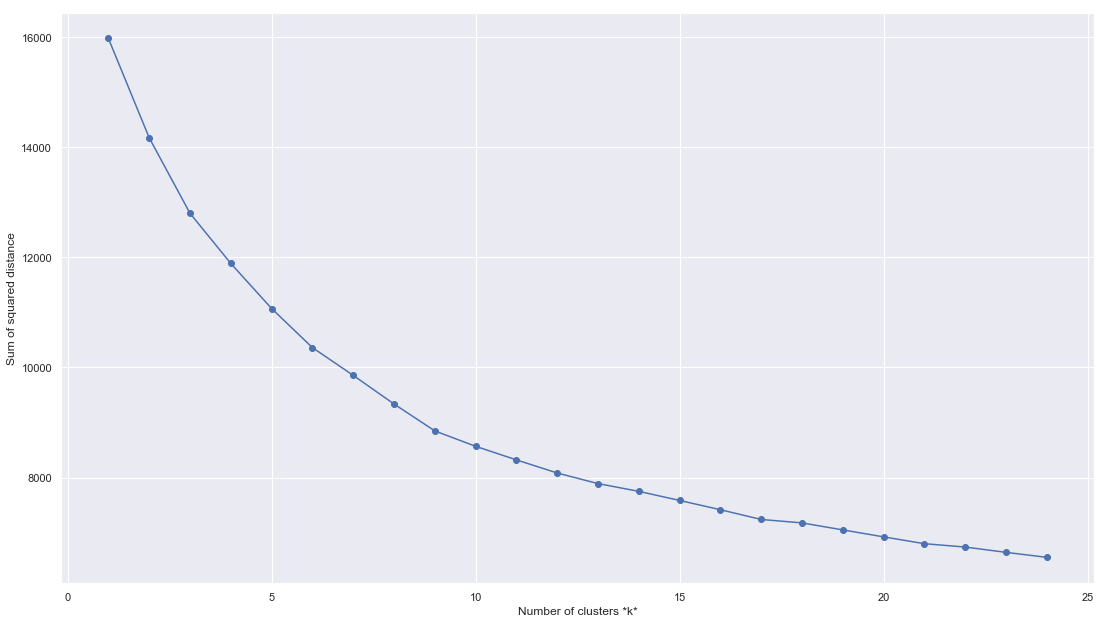

In [200]:
SSE = []
kClusters = list(range(1,25))
for k in kClusters:
    sseKmeans = KMeans(n_clusters=k)
    sseKmeans.fit(scaledCentredX)
    SSE.append(sseKmeans.inertia_)
# Plot SSE against Number of Clusters
plt.figure(figsize=(6, 6))
plt.plot(kClusters, SSE, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

('Max AMI socre: ', 0.7784634807102861)
('Average AMI socre: ', 0.7089139106048531)
('Min AMI socre: ', 0.6250375635037093)


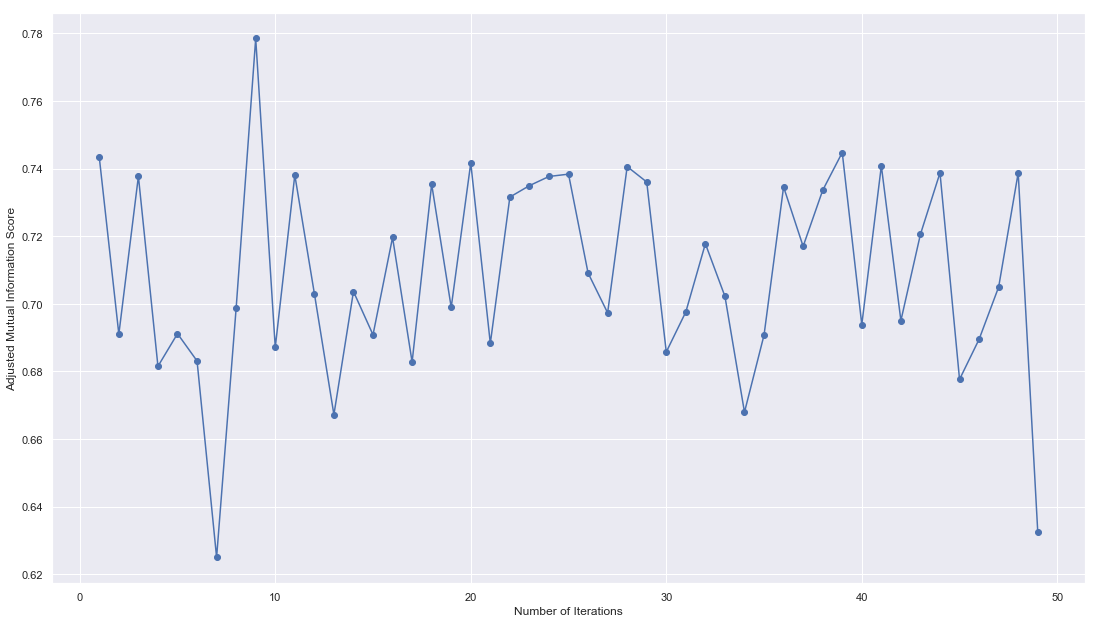

In [199]:
evalObject5 = [] 
numbIterations = list(range(1,50))
for j in numbIterations:
    def kmeansLoop(x,clst,itera,evals):
        km = KMeans(init='random',n_clusters=clst, n_init=itera)
        km.fit(x)
        km_pred = km.predict(x)
        evalObject5.append(evals(trueLabels, km_pred))
    kmeansLoop(scaledCentredX,10,1,adjusted_mutual_info_score)
print("Max AMI socre: ", max(evalObject5))
print("Average AMI socre: ", st.mean(evalObject5))
print("Min AMI socre: ", min(evalObject5))
plt.figure(figsize=(6, 6))
plt.plot(numbIterations, evalObject5, '-o')
plt.xlabel(r'Number of Iterations')
plt.ylabel('Adjusted Mutual Information Score')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

### Kmeans++

- Kmeans++ uses a probability density function to estimate centroid locations based on the shortest distance (Euclidean distance or otherwise) between data points and the nearest centroids. Hence the probability of allocating a data point $\text{x}_{i}$ to a centroid $\text{C}_{j}$ is propotional to the distance between $\text{x}_{i}$ and $\text{C}_{j}$

- Utilising this method helps to reduce the effects of *initilisation sensitivity* that is usually associated with traditional Kmeans algorithm. 

- Therefore, the ARI assocaited with a Kmean++ should remain unchanged (i.e. ARI = 0.7) over 20 iterations; provided the data and the initial **seed** remain constant.

### Using Cosine similarity measure

In [112]:
import nltk
from nltk.cluster.kmeans import KMeansClusterer
kclusterer = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=1, initial_means= None, normalise=False, svd_dimensions=None, rng=None)
assigned_clusters = kclusterer.cluster(scaledCentredX, assign_clusters=True)

In [113]:
print("ARI =", adjusted_rand_score(trueLabels, assigned_clusters))
print("AMI =", adjusted_mutual_info_score(trueLabels, assigned_clusters))

('ARI =', 0.3604388180875775)
('AMI =', 0.45664321665715163)


#### Run for 50 Iterations and Evaluate

('Max AMI socre: ', 0.4846657128798683)
('Average AMI socre: ', 0.43752508453027517)
('Min AMI socre: ', 0.3738140373866587)


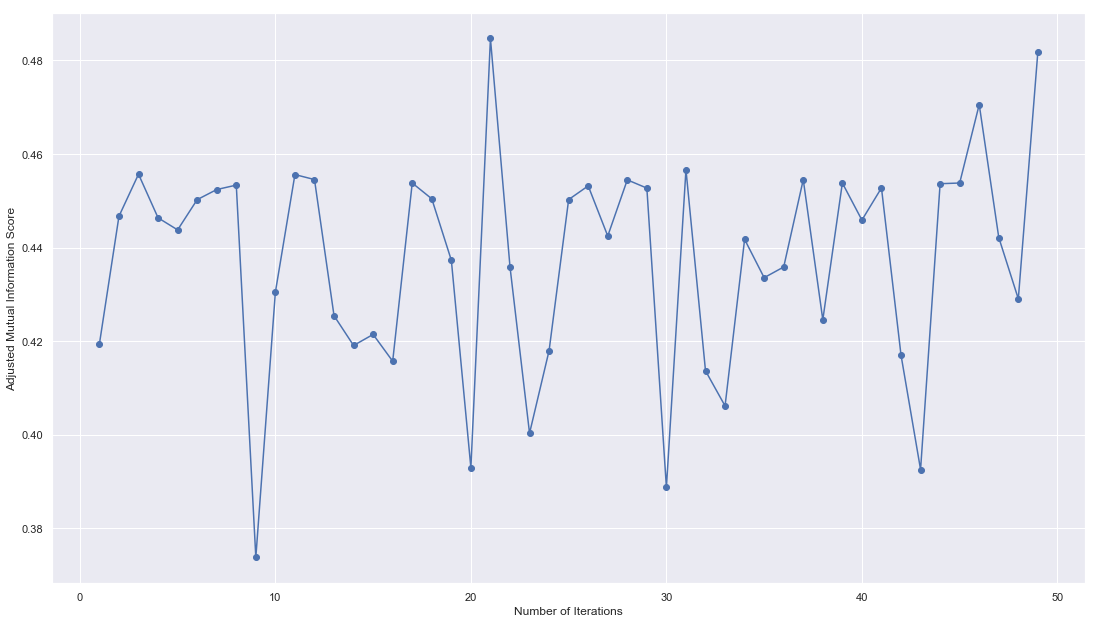

In [198]:
evalObject3 = [] 
numbIterations = list(range(1,50))
for l in numbIterations:
    def kmeansCosineLoop(x,clst,rps,evals):
        kclusterer = KMeansClusterer(clst, distance=nltk.cluster.util.cosine_distance, repeats=rps, initial_means= None, normalise=False, svd_dimensions=None, rng=None)
        km_pred = kclusterer.cluster(x, assign_clusters=True)
        evalObject3.append(evals(trueLabels, km_pred))
    kmeansCosineLoop(scaledCentredX,5,1,adjusted_mutual_info_score)
print("Max AMI socre: ", max(evalObject3))
print("Average AMI socre: ", st.mean(evalObject3))
print("Min AMI socre: ", min(evalObject3))
plt.figure(figsize=(6, 6))
plt.plot(numbIterations, evalObject3, '-o')
plt.xlabel(r'Number of Iterations')
plt.ylabel('Adjusted Mutual Information Score')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

('Max AMI socre: ', 0.390157095478294)
('Average AMI socre: ', 0.348333849413792)
('Min AMI socre: ', 0.2949854569976037)


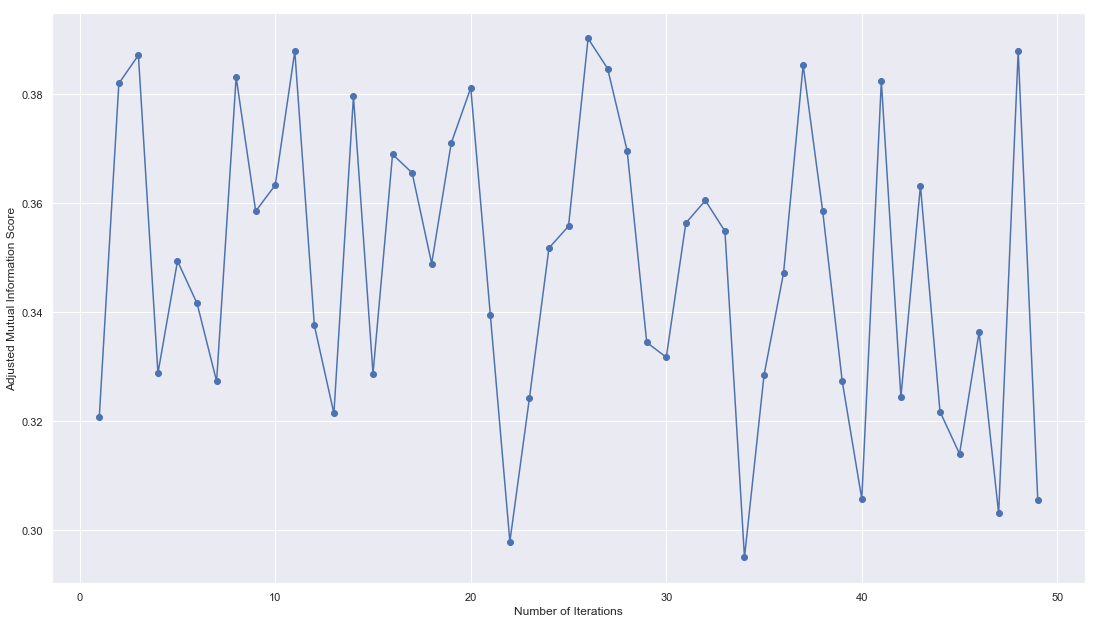

In [197]:
evalObject4 = [] 
numbIterations = list(range(1,50))
for l in numbIterations:
    def kmeansCosineLoop(x,clst,rps,evals):
        kclusterer = KMeansClusterer(clst, distance=nltk.cluster.util.cosine_distance, repeats=rps, initial_means= None, normalise=False, svd_dimensions=None, rng=None)
        km_pred = kclusterer.cluster(x, assign_clusters=True)
        evalObject4.append(evals(trueLabels, km_pred))
    kmeansCosineLoop(scaledCentredX,5,1,adjusted_rand_score)
print("Max AMI socre: ", max(evalObject4))
print("Average AMI socre: ", st.mean(evalObject4))
print("Min AMI socre: ", min(evalObject4))
plt.figure(figsize=(6, 6))
plt.plot(numbIterations, evalObject4, '-o')
plt.xlabel(r'Number of Iterations')
plt.ylabel('Adjusted Mutual Information Score');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

The results returned from the KMeans iteration using Cosine Similarity as the distance measure were very similar to those computed using the Euclidean distance measure. In both cases AMI returned a slightly higher score than did the ARI (44% and 35% respectively for Cosine Similarity and 43% and 34% for Euclidean distance). 
Which is ineteresting given the vastly different ways that both methods calculate ditances. 

# Part 2

#### Implement PCA

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pcaFit = pca.fit(scaledCentredX)
pcaFitTrans = pca.fit_transform(scaledCentredX)

#### Dimensionality Reduction

In [145]:
#Independant variance
indvVar=pca.explained_variance_ratio_
print(indvVar)

[0.1486111  0.13572199 0.11932346 0.08661138 0.05743912 0.04886328
 0.04307167 0.03655304 0.03362852 0.03049193 0.02353827 0.02331125
 0.01833318 0.01754251 0.01498296 0.01393236 0.01328784 0.0124217
 0.00988143 0.00888975 0.00877877 0.00799496 0.00767136 0.00714943
 0.00685227 0.00588163 0.00554822 0.00514565 0.00489219 0.00424213
 0.00366959 0.00350938 0.00326698 0.00322627 0.00306131 0.00288856
 0.00253501 0.00222311 0.00219348 0.00211    0.00186892 0.00157652
 0.00148278 0.00141502 0.00109406 0.00096488 0.00082396 0.00053738
 0.00049094 0.00021876]


[14.86 28.43 40.36 49.02 54.76 59.65 63.96 67.62 70.98 74.03 76.38 78.71
 80.54 82.29 83.79 85.18 86.51 87.75 88.74 89.63 90.51 91.31 92.08 92.79
 93.48 94.07 94.62 95.13 95.62 96.04 96.41 96.76 97.09 97.41 97.72 98.01
 98.26 98.48 98.7  98.91 99.1  99.26 99.41 99.55 99.66 99.76 99.84 99.89
 99.94 99.96]


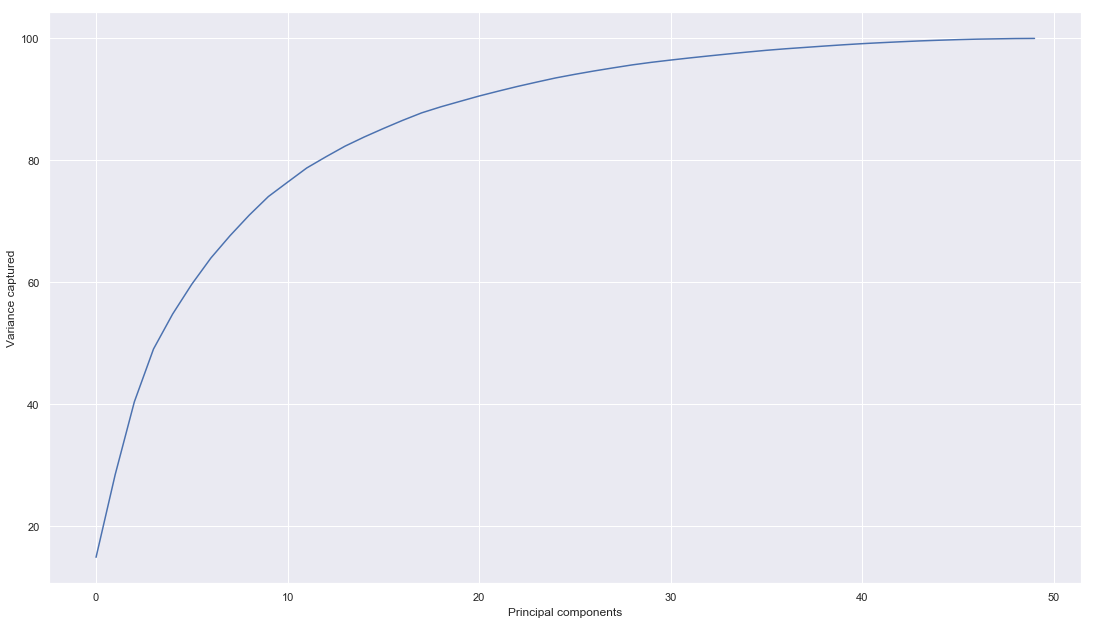

In [196]:
#Cumilative Variance
cumVar=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumVar)
plt.plot(cumVar)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

Therefore in order to capture $\geq$ 95% of variance we need a min of 28 principle components

#### Project data unto PC1 and PC2

In [148]:
twoComp = PCA(n_components=2)
projectData = twoComp.fit_transform(scaledCentredX)
print(scaledCentredX.shape)
print(projectData.shape)

(1630, 63)
(1630, 2)


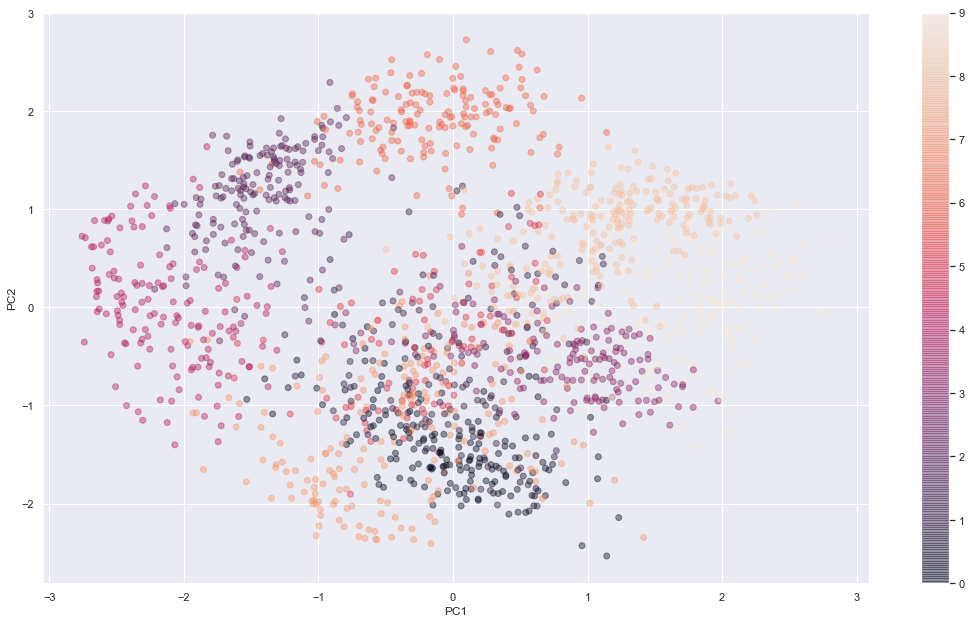

In [203]:
#Plot unto first 2 principle components
plt.scatter(projectData[:,0], projectData[:,1],c=kMeans_pred, alpha=0.4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

Text(0,0.5,'PC2')

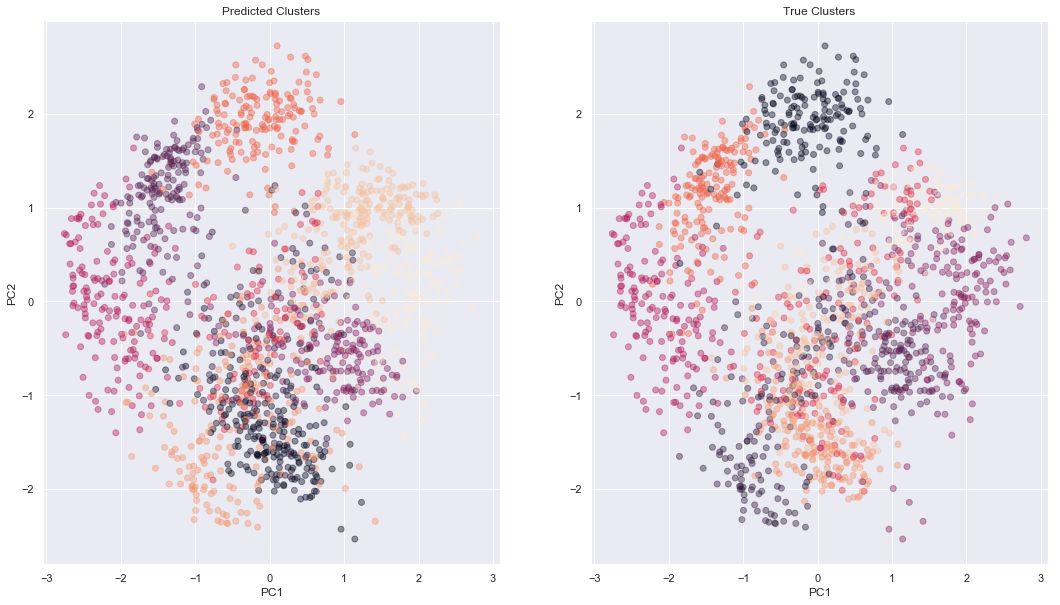

In [217]:
#Create Subplot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 10),)  
fig.subplots_adjust(wspace=0.2) # leave some space between figs

#Plot Predicted Clusters
axs[0].scatter(projectData[:,0], projectData[:,1],c=kMeans_pred, alpha=0.4)
axs[0].set_title("Predicted Clusters")
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

#Plot True Clusters 
axs[1].scatter(projectData[:,0], projectData[:,1],c=trueLabels, alpha=0.4)
axs[1].set_title("True Clusters")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

As we can see from the above the predicted clusters vary vastly from the expected grouping seen in the true labels. This is a visual reflection of the poor model performance outlined using AMI and ARI. 